In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/cell_images/cell_images/"))

# Any results you write to the current directory are saved as output.

['Uninfected', 'Parasitized']


In [2]:
import os.path,shutil
import gc
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing.image import load_img
from keras.utils import np_utils
import random
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score,accuracy_score
%matplotlib inline

Using TensorFlow backend.


In [3]:
# create folder
os.makedirs("../working/train/Parasitized/")
os.makedirs('../working/validation/Parasitized/')
os.makedirs('../working/test/Parasitized/')
os.makedirs("../working/train/Uninfected/")
os.makedirs('../working/validation/Uninfected/')
os.makedirs('../working/test/Uninfected/')


In [4]:
gc.collect()
# copy/split data into train/validation/test folder, with ratio 0.8/0.1/0.1

for path in os.listdir("../input/cell_images/cell_images/Parasitized/"):
    if path.split('.')[1]=='png':
        n=random.uniform(1,100)
        if n>=90:
            shutil.copyfile("../input/cell_images/cell_images/Parasitized/"+path,
                            "../working/test/Parasitized/"+path)
        elif ((80<=n) and (n<90)):
            shutil.copyfile("../input/cell_images/cell_images/Parasitized/"+path,
                            "../working/validation/Parasitized/"+path)
        elif n<80:
            shutil.copyfile("../input/cell_images/cell_images/Parasitized/"+path,
                            "../working/train/Parasitized/"+path)
for path in os.listdir("../input/cell_images/cell_images/Uninfected/"):
    if path.split('.')[1]=='png':
        n=random.uniform(1,100)
        if n>=90:
            shutil.copyfile("../input/cell_images/cell_images/Uninfected/"+path,
                            "../working/test/Uninfected/"+path)
        elif ((80<=n) and (n<90)):
            shutil.copyfile("../input/cell_images/cell_images/Uninfected/"+path,
                            "../working/validation/Uninfected/"+path)
        elif n<80:
            shutil.copyfile("../input/cell_images/cell_images/Uninfected/"+path,
                            "../working/train/Uninfected/"+path)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


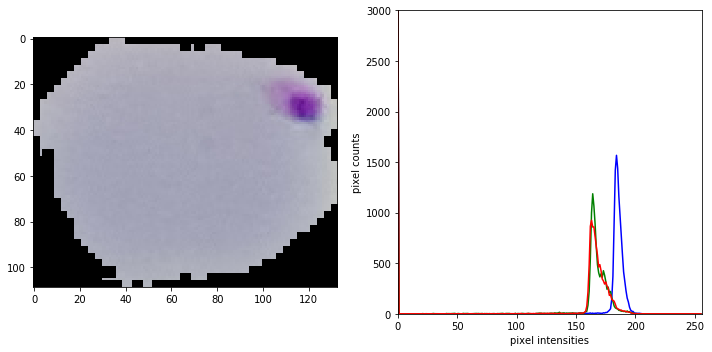

In [61]:
# random select a img and show + plot its RGB intensities histgram, ref : https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html
fig = plt.figure(figsize=(10,5))
path = random.choice(os.listdir("../input/cell_images/cell_images/Parasitized/"))
path = "../input/cell_images/cell_images/Parasitized/"+path
img = cv2.imread(path)
color = ('b','g','r')
fig.add_subplot(121)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    fig.add_subplot(122)
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.ylim([0,3000])
    plt.xlabel('pixel intensities')
    plt.ylabel('pixel counts')
plt.tight_layout()
plt.show()

In [47]:
# load data sets check it's size distribution statistic
gc.collect()
data_size_x = []
data_size_y = []
for path in os.listdir("../input/cell_images/cell_images/Parasitized/"):
    if path.split('.')[1]=='png':
        img = cv2.imread("../input/cell_images/cell_images/Parasitized/"+path)
        img_array = img_to_array(img)
        data_size_x.append(img_array.shape[0])
        data_size_y.append(img_array.shape[1])
for path in os.listdir("../input/cell_images/cell_images/Uninfected/"):
    if path.split('.')[1]=='png':
        img = cv2.imread("../input/cell_images/cell_images/Uninfected/"+path)
        img_array = img_to_array(img)
        data_size_x.append(img_array.shape[0])
        data_size_y.append(img_array.shape[1])
data_size_x = np.array(data_size_x)
data_size_y = np.array(data_size_y)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'data counts')

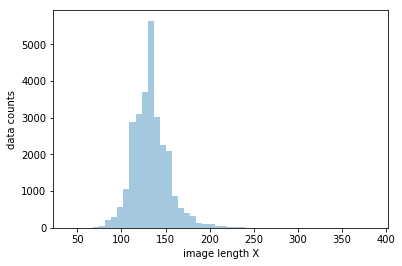

In [66]:
import seaborn as sns
sns.distplot(data_size_x,kde=False) # plot size ditribution
plt.xlabel('image length X')
plt.ylabel('data counts')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'data counts')

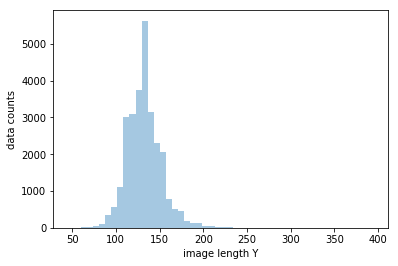

In [67]:
sns.distplot(data_size_y,kde=False) # plot size ditribution
plt.xlabel('image length Y')
plt.ylabel('data counts')

In [ ]:
# load test data for further use
test_data= []
test_label = []

        
for path in os.listdir("../working/test/Uninfected/"):
    if path.split('.')[1]=='png':
        img_read  = plt.imread("../working/test/Uninfected/"+path)
        image=cv2.resize(img_read,(64,64))
        image = img_to_array(image)
        test_data.append(image)
        test_label.append(0)
for path in os.listdir("../working/test/Parasitized/"):
    if path.split('.')[1]=='png':
        img_read  = plt.imread("../working/test/Parasitized/"+path)
        image=cv2.resize(img_read,(64,64))
        image = img_to_array(image)
        test_data.append(image)
        test_label.append(1)
test_data=np.array(test_data)
test_label = np.array(test_label)


In [ ]:
len(os.listdir("../working/train/Uninfected/")),len(os.listdir("../working/validation/Uninfected/")),len(os.listdir("../working/test/Uninfected/"))

In [ ]:
len(os.listdir("../working/train/Parasitized/")),len(os.listdir("../working/validation/Parasitized/")),len(os.listdir("../working/test/Parasitized/"))

In [ ]:
train_len = len(os.listdir("../working/train/Uninfected/"))+len(os.listdir("../working/train/Parasitized/"))
test_len = len(os.listdir("../working/test/Uninfected/"))+len(os.listdir("../working/test/Parasitized/"))
val_len = len(os.listdir("../working/validation/Uninfected/"))+len(os.listdir("../working/validation/Parasitized/"))

In [ ]:
#print out some images
fig=plt.figure(figsize=(10,40))
a=1
for i in range(20):
    fig.add_subplot(20,4,a)
    plt.imshow(plt.imread("../working/test/Parasitized/"+random.choice(os.listdir("../working/test/Parasitized/"))))
    a+=1

In [ ]:
#print out some images
fig=plt.figure(figsize=(10,40))
a=1
for i in range(20):
    fig.add_subplot(20,4,a)
    plt.imshow(plt.imread("../working/test/Uninfected/"+random.choice(os.listdir("../working/test/Uninfected/"))))
    a+=1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score

In [48]:
from keras.layers import BatchNormalization,GlobalAveragePooling2D,Conv2D,MaxPooling2D,Softmax,Dropout,Input,SeparableConv2D
from keras.layers import DepthwiseConv2D,Dense,Activation,Flatten
from keras.layers import GlobalMaxPooling2D,Input

In [49]:
from keras import optimizers,callbacks
from keras.models import Sequential
from tensorflow.python.keras import backend as K
from keras import backend as KB
from keras.preprocessing.image import ImageDataGenerator,load_img
"""
Build model and set up optimizer + callbacks (save best validation model, check training time)
2X SeparableConv2D + SeparableConv2D(strides:2 for feature map dim reduction)
Global average pooling layer on top before output dense layer
"""
size = 64
KB.clear_session()
model = Sequential()
model.add(SeparableConv2D(32, (3, 3),strides=(1,1), input_shape = (size, size, 3), activation = 'selu'))
model.add(SeparableConv2D(32, (3, 3),strides=(2,2), activation = 'selu'))
model.add(SeparableConv2D(32, (3, 3),strides=(1,1), activation = 'selu'))
model.add(SeparableConv2D(32, (3, 3),strides=(2,2), activation = 'selu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(2,activation = 'softmax'))
optimizer = optimizers.SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
checkpointer = callbacks.ModelCheckpoint(filepath='/tmp/weights.hdf5', verbose=1, save_best_only=True)
model.compile(optimizer =optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 62, 62, 32)        155       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 30, 30, 32)        1344      
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 28, 28, 32)        1344      
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 13, 13, 32)        1344      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 4,253
Trainable params: 4,253
Non-trainable params: 0
__

def train_grid(channel,train_len,test_len,val_len):
    """
    function for gridsearch
    Arg:
        channel(list or int) : the filter numbers split
        train_len : train data counts
        train_len : test data counts
        val_len : validation data counts
    
    """
    
    from keras import backend as KB
    
    score = {}
    for ch in channel:
        KB.clear_session()
        gc.collect()
        model = Sequential()
        model.add(SeparableConv2D(ch, (3, 3),strides=(1,1), input_shape = (size, size, 3), activation = 'selu'))
        model.add(SeparableConv2D(ch, (3, 3),strides=(2,2), activation = 'selu'))
        model.add(SeparableConv2D(ch, (3, 3),strides=(1,1), activation = 'selu'))
        model.add(SeparableConv2D(ch, (3, 3),strides=(2,2), activation = 'selu'))
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2,activation = 'softmax'))
        optimizer = optimizers.SGD(lr=lrate,decay=1e-6,momentum=0.9,nesterov=True)
        model.compile(optimizer =optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        train_gen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rescale=1./255)
        test_gen=ImageDataGenerator(rescale=1./255)
        valid_gen=ImageDataGenerator(rescale=1./255)
        train_gen =train_gen.flow_from_directory("../working/train/",batch_size=batch,shuffle=True,target_size=(64,64),classes = ['Uninfected','Parasitized'])
        test_gen= test_gen.flow_from_directory("../working/test/",batch_size=test_len,shuffle=False,target_size=(64,64),classes = ['Uninfected','Parasitized'])
        valid_gen=valid_gen.flow_from_directory("../working/validation/",batch_size=batch,shuffle=True,target_size=(64,64),classes = ['Uninfected','Parasitized'])
        checkpointer = callbacks.ModelCheckpoint(filepath='/tmp/weights'+str(lrate)+str(batch)+'.hdf5', verbose=1, save_best_only=True)
        history = model.fit_generator(train_gen,
                              steps_per_epoch=train_len//batch,
                              epochs=50,
                              shuffle=False,
                              callbacks=[checkpointer,time_callback],validation_data=valid_gen,validation_steps=val_len//batch)
        model.load_weights('/tmp/weights'+str(channel)+'.hdf5')
        acc_t= model.evaluate_generator(test_gen,1)
        acc_v = model.evaluate_generator(valid_gen,val_len//batch)
        f1 = f1_score(test_label,np.argmax(model.predict_generator(test_gen,1,verbose=1),axis=1))
        precision = precision_score(test_label,np.argmax(model.predict_generator(test_gen,1,verbose=1),axis=1))
        recall = recall_score(test_label,np.argmax(model._generator(test_gen,1,verbose=1),axis=1))
        score[str(ch)] = {'history':history,'acc_t':acc_t,'acc_v':acc_v,'f1':f1,'precision':precision,'recall':recall}
    return score

score = train_grid([32,64],train_len,test_len,val_len)
          
  

In [ ]:
# create keras image generator object
train_gen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rescale=1./255)
test_gen=ImageDataGenerator(rescale=1./255)
valid_gen=ImageDataGenerator(rescale=1./255)
train_gen =train_gen.flow_from_directory("../working/train/",batch_size=32,shuffle=True,target_size=(size,size),classes = ['Uninfected','Parasitized']
                                         )
test_gen= test_gen.flow_from_directory("../working/test/",batch_size=test_len,shuffle=False,target_size=(size,size),classes = ['Uninfected','Parasitized']
                                      )
valid_gen=valid_gen.flow_from_directory("../working/validation/",batch_size=32,shuffle=True,target_size=(size,size),classes = ['Uninfected','Parasitized']
                                       )


In [ ]:
print(train_gen.class_indices,valid_gen.class_indices,test_gen.class_indices)

In [ ]:
# create training time callback object to record training time for each epoch
import time
class TimeHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback=TimeHistory()

In [ ]:
# train model
history = model.fit_generator(train_gen,
                              steps_per_epoch=train_len//32,
                              epochs=50,
                              shuffle=False,
                              callbacks=[checkpointer,time_callback],validation_data=valid_gen,validation_steps=val_len//32)

In [ ]:
# plot training accuracy/validation accuracy for each epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [ ]:
# print out the training time for each epoch
times = time_callback.times
times

In [ ]:
#load model with best validation accuracy and check validation accuracy
model.load_weights('/tmp/weights.hdf5')
print(model.evaluate_generator(valid_gen,val_len//32,verbose=1))

In [ ]:
# calcute model performance (accuracy/f1/precision/recall) on test data set
print("acc:",model.evaluate_generator(test_gen,1))
print("f1:",f1_score(test_label,np.argmax(model.predict_generator(test_gen,1,verbose=1),axis=1)))
print(confusion_matrix(test_label,np.argmax(model.predict_generator(test_gen,1,verbose=1),axis=1)))
print("precision:",precision_score(test_label,np.argmax(model.predict_generator(test_gen,1,verbose=1),axis=1)))
print("recall:",recall_score(test_label,np.argmax(model.predict_generator(test_gen,1,verbose=1),axis=1)))

In [ ]:
def gradcam(model,img_path,channel,size):
    """
    Grad-Cam for given model/image location
    
    Arg:
        model(object) : model for generate image
        img_path (string) : path of original image
        channel (int) : channel counts of last convolution layer
        size(int) : image will resize to this before input to model 
    
    return:
        class_idx(int) : the class index predict by model
        heatmap(array) : the output heatmap array
    
    """
    x = plt.imread(img_path)
    x = cv2.resize(x,(size,size))
    x = img_to_array(x) 
    x =np.expand_dims(x,axis=0)
    pred = model.predict(x)
    class_idx = np.argmax(pred[0])
    class_output = model.output[:,class_idx]
    last_conv = model.get_layer('separable_conv2d_4')
    grads = KB.gradients(class_output,last_conv.output)[0]
    pooled_grad=KB.mean(grads,axis=(0,1,2))
    iterate = KB.function([model.input],[pooled_grad,last_conv.output[0]])
    pool_grad_val,conv_val = iterate([x])
    for i in range(channel):
        conv_val [:,:,i]*=pool_grad_val[i]
        
    heatmap = np.sum(conv_val,axis=-1)
    heatmap = np.maximum(heatmap,0)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255/np.max(heatmap)* heatmap) #normalize to 1-255 
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap,cv2.COLOR_BGR2RGB)
    return class_idx,heatmap
     

In [ ]:
# print out random Grad Cam result 
fig = plt.figure(figsize=(15,100))
a=1
while a<30:
    path = random.choice(os.listdir("../working/test/Parasitized/"))
    img_path="../working/test/Parasitized/"+path
    class_pred,heatmap=gradcam(model,img_path,32,64)
    fig.add_subplot(20,3,a)
    plt.title('predict_class:'+('Uninfected' if class_pred==0 else 'Parasitized'))
    img = plt.imread(img_path)
    plt.imshow(img)
    a+=1
    fig.add_subplot(20,3,a)
    plt.title('heatmap')
    plt.imshow(heatmap)
    a+=1
    fig.add_subplot(20,3,a)
    plt.title('imposed')
    plt.imshow(cv2.addWeighted(img,0.7,np.array(heatmap*1./255,dtype='f'),0.3,0,))
    a+=1
        
    

In [ ]:
# print out random Grad Cam result 
fig = plt.figure(figsize=(15,100))
a=1
while a<30:
    path = random.choice(os.listdir("../working/test/Uninfected/"))
    img_path="../working/test/Uninfected/"+path
    class_pred,heatmap=gradcam(model,img_path,32,64)
    fig.add_subplot(20,3,a)
    plt.title('predict_class:'+('Uninfected' if class_pred==0 else 'Uninfected'))
    img = plt.imread(img_path)
    plt.imshow(img)
    a+=1
    fig.add_subplot(20,3,a)
    plt.title('heatmap')
    plt.imshow(heatmap)
    a+=1
    fig.add_subplot(20,3,a)
    plt.title('imposed')
    plt.imshow(cv2.addWeighted(img,0.7,np.array(heatmap*1./255,dtype='f'),0.3,0,))
    a+=1

In [ ]:
# list out test error image list
np.argmax(model.predict(test_data),axis=1)
ng_idx=np.where(np.argmax(model.predict(test_data),axis=1)!=test_label)
ng=test_data[ng_idx]
ng_label = test_label[ng_idx]
print(model.predict(np.expand_dims(ng[0],0)))
plt.imshow(ng[0])

In [ ]:
def gradcam_array(model,array,channel):
    """
    Grad-Cam for given model/image array
    
    Arg:
        model(object) : model for generate image
        array (numpy array) : image array
        channel (int) : channel counts of last convolution layer
    
    return:
        class_idx(int) : the class index predict by model
        heatmap(array) : the output heatmap array
    
    """
    array1=np.expand_dims(array,0)
    pred = model.predict(array1)
    class_idx = np.argmax(pred[0])
    print("predict_class_idx:",class_idx)
    class_output = model.output[:,class_idx]
    last_conv=model.get_layer("separable_conv2d_4")
    grads = KB.gradients(class_output,last_conv.output)[0]
    pooled_grad=KB.mean(grads,axis=(0,1,2))
    iterate = KB.function([model.input],[pooled_grad,last_conv.output[0]])
    pool_grad_val,conv_val = iterate([array1])
    for i in range(channel):
        conv_val [:,:,i]*=pool_grad_val[i]
        
    heatmap = np.sum(conv_val,axis=-1)
    heatmap = np.maximum(heatmap,0)
    heatmap = cv2.resize(heatmap, (64, 64))
    heatmap = np.uint8((255/np.max(heatmap)) * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap,cv2.COLOR_BGR2RGB)
    return class_idx,heatmap
   

In [ ]:
# print out random Grad Cam result for test images which predicted error by model 
fig = plt.figure(figsize=(15,100))
a=1
while a<30:
    arr,label = random.choice(list(zip(ng,ng_label)))
    class_pred,heatmap=gradcam_array(model,arr,32)
    fig.add_subplot(20,3,a)
    plt.title('predict_class:'+('Uninfected' if class_pred==0 else 'Parasitized')+"/actual:"+('Uninfected' if label==0 else 'Parasitized'))
    plt.imshow(arr)
    a+=1
    fig.add_subplot(20,3,a)
    plt.title('heatmap')
    plt.imshow(heatmap)
    a+=1
    fig.add_subplot(20,3,a)
    plt.title('imposed')
    plt.imshow(cv2.addWeighted(arr,0.7,np.array(heatmap*1./255,dtype='f'),0.3,0,))
    a+=1
        

from tensorflow.python.keras import layers as kl

class BatchNormalization(kl.BatchNormalization):
    def call(self, inputs, training=None):
        true_phase = int(K.get_session().run(K.learning_phase()))
        trainable = int(self.trainable)
        with K.learning_phase_scope(trainable * true_phase):
            ret = super(BatchNormalization, self).call(inputs, training)
        return ret

from keras import backend as KB
KB.clear_session()
gc.collect()
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as res_preprocess
from keras.models import Model
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
prediction = Dense(2,activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=prediction)
for layer in base_model.layers:
    layer.trainable = False

#optimizer = optimizers.SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath='/tmp/resweights.hdf5', verbose=1, save_best_only=True,save_weights_only=True)
train_gen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True,preprocessing_function=res_preprocess)
test_gen=ImageDataGenerator(preprocessing_function=res_preprocess)
valid_gen=ImageDataGenerator(preprocessing_function=res_preprocess)
train_gen =train_gen.flow_from_directory("../working/train/",batch_size=32,shuffle=True,target_size=(224,224),classes = ['Uninfected','Parasitized'])
test_gen= test_gen.flow_from_directory("../working/test/",batch_size=32,shuffle=False,target_size=(224,224),classes = ['Uninfected','Parasitized'])
valid_gen=valid_gen.flow_from_directory("../working/val/",batch_size=32,shuffle=True,target_size=(224,224),classes = ['Uninfected','Parasitized'])
print(train_gen.class_indices,valid_gen.class_indices,test_gen.class_indices)
model.summary()
history = model.fit_generator(train_gen,
                              steps_per_epoch=train//32,
                              epochs=15,
                              shuffle=False,
                              callbacks=[time_callback,checkpointer],validation_data=valid_gen,validation_steps=val//32)

#model.load_weights('/tmp/resweights.hdf5')
print(model.evaluate_generator(test_gen,test//32))

print("f1:",f1_score(test_label,np.argmax(model.predict_generator(test_gen,test//32),axis=1)))
print(confusion_matrix(test_label,np.argmax(model.predict_generator(test_gen,test//32),axis=1)))
print("precision:",precision_score(test_label,np.argmax(model.predict_generator(test_gen,test//32),axis=1)))
print("recall:",recall_score(test_label,np.argmax(model.predict_generator(test_gen,test//32),axis=1)))

KB.clear_session()
gc.collect()
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input as xce_preprocess
from keras.models import Model
base_model = Xception(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
prediction = Dense(2,activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=prediction)
for layer in base_model.layers:
    layer.trainable = False
#checkpointer = callbacks.ModelCheckpoint(filepath='/tmp/xceweights.hdf5', verbose=1, save_best_only=True,save_weights_only=True)
optimizer = optimizers.SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(optimizer =optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy']) 
train_gen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True,preprocessing_function=xce_preprocess)
test_gen=ImageDataGenerator(preprocessing_function=xce_preprocess)
valid_gen=ImageDataGenerator(preprocessing_function=xce_preprocess)
train_gen =train_gen.flow_from_directory("../working/train/",batch_size=32,shuffle=True,target_size=(299,299),classes = ['Uninfected','Parasitized'])
test_gen= test_gen.flow_from_directory("../working/test/",batch_size=32,shuffle=False,target_size=(299,299),classes = ['Uninfected','Parasitized'])
valid_gen=valid_gen.flow_from_directory("../working/val/",batch_size=32,shuffle=True,target_size=(299,299),classes = ['Uninfected','Parasitized'])
model.summary()
history = model.fit_generator(train_gen,
                              steps_per_epoch=train//32,
                              epochs=15,
                              shuffle=False,
                              callbacks=[time_callback],validation_data=valid_gen,validation_steps=val//32)    

#model.load_weights('/tmp/xceweights.hdf5')
print(model.evaluate_generator(test_gen,test//32))

print("f1:",f1_score(test_label,np.argmax(model.predict(xce_preprocess(test_data),axis=1))))
print(confusion_matrix(test_label,np.argmax(model.predict(xce_preprocess(test_data),axis=1))))
print("precision:",precision_score(test_label,np.argmax(model.predict(xce_preprocess(test_data),axis=1))))
print("recall:",recall_score(test_label,np.argmax(model.predict(xce_preprocess(test_data),axis=1))))

K.clear_session()
gc.collect()
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input as den_preprocess
base_model = DenseNet121(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
prediction = Dense(2,activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=prediction)
for layer in base_model.layers:
    layer.trainable = False
optimizer = optimizers.SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
#checkpointer = callbacks.ModelCheckpoint(filepath='/tmp/denweights.hdf5', verbose=1, save_best_only=True,save_weights_only=True)
train_gen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True,preprocessing_function=den_preprocess)
test_gen=ImageDataGenerator(preprocessing_function=den_preprocess)
valid_gen=ImageDataGenerator(preprocessing_function=den_preprocess)
train_gen =train_gen.flow_from_directory("../working/train/",batch_size=32,shuffle=True,target_size=(224,224),classes = ['Uninfected','Parasitized'])
test_gen= test_gen.flow_from_directory("../working/test/",batch_size=32,shuffle=False,target_size=(224,224),classes = ['Uninfected','Parasitized'])
valid_gen=valid_gen.flow_from_directory("../working/val/",batch_size=32,shuffle=True,target_size=(224,224),classes = ['Uninfected','Parasitized'])
model.summary()
history = model.fit_generator(train_gen,
                              steps_per_epoch=train//32,
                              epochs=5,
                              shuffle=False,
                              callbacks=[time_callback],validation_data=valid_gen,validation_steps=val//32)

model.load_weights('/tmp/denweights.hdf5')
print(model.evaluate_generator(test_gen,test//32))

print("f1:",f1_score(test_label,np.argmax(model.predict(den_preprocess(test_data),axis=1))))
print(confusion_matrix(test_label,np.argmax(model.predict(den_preprocess(test_data),axis=1))))
print("precision:",precision_score(test_label,np.argmax(model.predict(den_preprocess(test_data),axis=1))))
print("recall:",recall_score(test_label,np.argmax(model.predict(den_preprocess(test_data),axis=1))))

KB.clear_session()
gc.collect()

In [ ]:
from fastai.vision import *
from fastai.core import *
from fastai import *

In [ ]:
#create image augmentation object
tfms=get_transforms(flip_vert=True,max_zoom=1,max_warp=None,p_affine=0)
#create databunch object to load data
data = ImageDataBunch.from_folder("../working/",test='test',valid='validation',size=224,ds_tfms=tfms,classes =['Uninfected','Parasitized'])

In [ ]:
# normalize input & print out samples
data.normalize()
data.show_batch(figsize=(10,10))

In [ ]:
"""
create dense121/resnet50/vgg16(with batch normalization) learners and train for 5 cycle
made predict for validation/test data
finally output accuracy/f1/precision/recall score
"""
score_board = {}
for m in [models.densenet121,models.resnet50,models.vgg16_bn]:
    learn = cnn_learner(data,m,metrics=accuracy)
    learn.fit_one_cycle(5)
    pred_v,y = learn.get_preds()
    pred_t = learn.get_preds(ds_type=DatasetType.Test)
    acc_t = accuracy_score(test_label,np.argmax(pred_t[0].numpy(),axis=1))
    acc_v = accuracy_score(y.numpy(),np.argmax(pred_v.numpy(),axis=1))
    f1 = f1_score(test_label,np.argmax(pred_t[0].numpy(),axis=1))
    precision = precision_score(test_label,np.argmax(pred_t[0].numpy(),axis=1))
    recall = recall_score(test_label,np.argmax(pred_t[0].numpy(),axis=1))
    score_board[m.__name__] = {'f1':f1,'precision':precision,'recall':recall,'acc_t':acc_t,'acc_v':acc_v}

In [ ]:
score_board

In [ ]:
# create interpretation object from learner, which can check the model performance
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
#plot confusion matrix
interp.plot_confusion_matrix()

In [ ]:
#plot top losses images and heatmap
interp.plot_top_losses(9,figsize=(15,15))